# Data Visualization with Seaborn

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# obtained from https://think.cs.vt.edu/corgis/python/broadway/broadway.html
datafile = 'broadway.csv'

In [4]:
data = pd.read_csv('broadway.csv')

In [5]:
data.head()

,Attendance,Capacity,Day,Full,Gross,Gross Potential,Month,Name,Performances,Theatre,Type,Year
0,5500,88,26,08/26/1990,134456,0,8,Tru,8,Booth,Play,1990
1,1737,100,24,03/24/1991,100647,0,3,Miss Saigon,0,Broadway,Musical,1991
2,12160,100,31,03/31/1991,634424,0,3,Miss Saigon,0,Broadway,Musical,1991
3,13921,100,7,04/07/1991,713353,0,4,Miss Saigon,0,Broadway,Musical,1991
4,10973,90,14,04/14/1991,573981,0,4,Miss Saigon,4,Broadway,Musical,1991


In [6]:
data.shape

(31296, 12)

## Bar plot

In [7]:
gross_inc_bymovie = data.groupby('Name')['Gross'].sum().reset_index()
top10_gross_alltime = gross_inc_bymovie.sort_values('Gross', ascending=False)[:10]

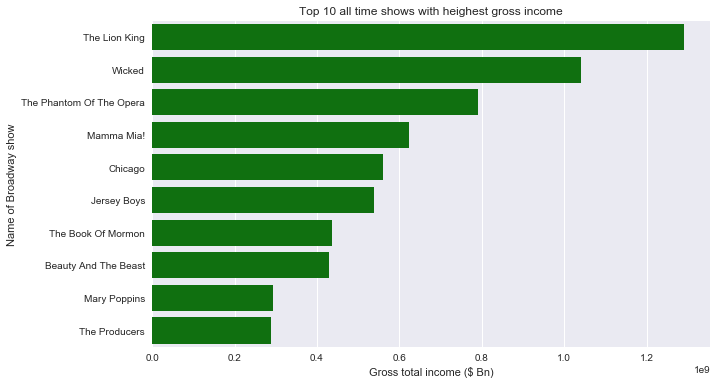

In [8]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.barplot(y="Name", x="Gross", data=top10_gross_alltime, color = 'green')
ax.set(xlabel='Gross total income ($ Bn)', ylabel='Name of Broadway show', 
       title = 'Top 10 all time shows with heighest gross income')

Plot above shows 10 broadway shows having the heighest gross income in the period 1990-2016. 'The Lion King' was able to accumilate more than $1.2bn of gross income during its time.

## Histogram

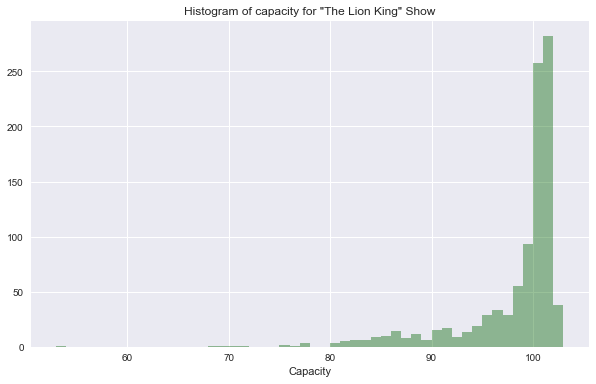

In [25]:
ax = sns.distplot(data[data.Name == 'The Lion King']['Capacity'],
             kde = False, bins = 50, hist_kws = {"color" : 'darkgreen'}, )
ax.set(title = 'Histogram of capacity for "The Lion King" Show')

Plot above shows a histogram of capacity (% of the theatre that was filled) for 'The Lion King' show. Plot indicates that often the theatre was on full or over capacity, which shows how popular the show was.

## Scatter plot - bivariate

In [11]:
by_show_attendance_income = data.groupby('Name')[['Attendance', 'Gross']]\
                                    .sum().reset_index()

[None,
 None,

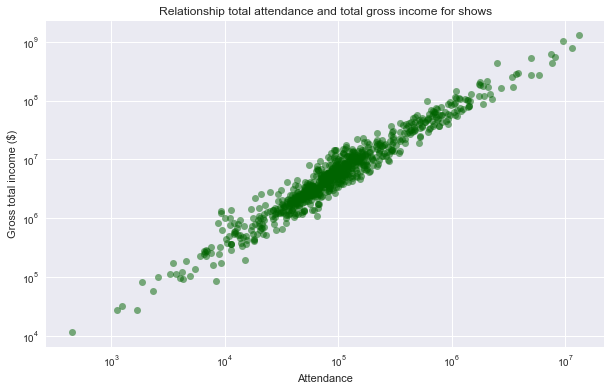

In [69]:
ax = sns.regplot(x = 'Attendance', y = 'Gross', data = by_show_attendance_income, 
            fit_reg=False, color = 'darkgreen', scatter_kws={'alpha':0.5})
ax.set(xscale="log", yscale="log", ylabel='Gross total income ($)', 
       title = 'Relationship total attendance and total gross income for shows')

As you would expect total attendance and total gross income of shows have strong linear relationship.

## Scatter plot - trivariate 

In [32]:
by_show_attendance_income = data.groupby(['Name', 'Type'])[['Attendance', 'Gross', 'Type']]\
                                    .sum().reset_index()

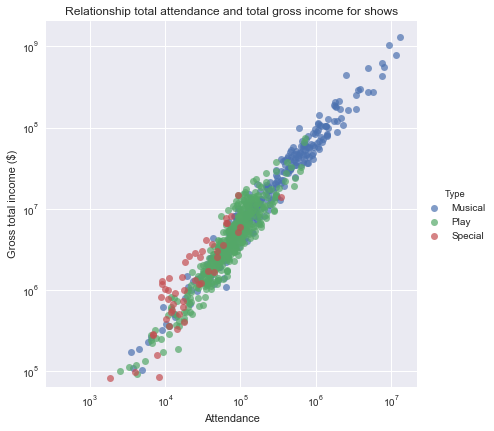

In [71]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lmplot(x = 'Attendance', y = 'Gross', data = by_show_attendance_income, 
                fit_reg=False, hue = 'Type', size=6, 
                hue_order = ['Musical', 'Play', 'Special'], scatter_kws={'alpha':0.7})
ax.set(xscale="log", yscale="log",  ylabel='Gross total income ($)',
       title = 'Relationship total attendance and total gross income for shows')

When we distinguish the type of play in plot of total attendance and total gross income of shows, we can see that it is the Musicals that had the potential to reach more than attendance level beyond 1million and gross income beyond $100million

## Swarm plot

In [57]:
# top 5 theatres with by gross income
top5_theatre = data.groupby('Theatre')['Gross'].sum().reset_index()\
                    .sort_values('Gross', ascending = False)
top5_theatre = top5_theatre['Theatre'][:5]
top5_theatre

21         Gershwin
37         Minskoff
41    New Amsterdam
34         Majestic
42           Palace
Name: Theatre, dtype: object

In [62]:
top5_theatre_data = data[data.Theatre.isin(top5_theatre)]
top5_theatre_data = top5_theatre_data.groupby(['Theatre', 'Name'])['Gross']\
                                        .sum().reset_index()

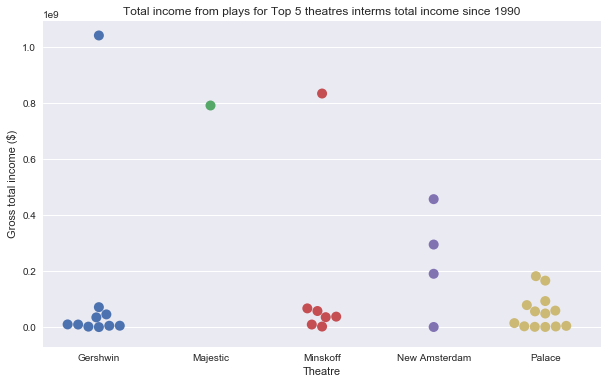

In [73]:
ax = sns.swarmplot(x='Theatre', y='Gross', data = top5_theatre_data, size=10)
ax.set(ylabel='Gross total income ($)',
       title = 'Total income from plays for Top 5 theatres interms total income since 1990')

In above plot correspond only 5 theatres. These were filtered out to be the theatres with heighest total income since 1990. For theses theaters, plot above shows the income generated by each play shown. Supprisingly 'Majestic' has earned all of income from a single play since 1990, which is 'Phantom of Opera'

## Faceted Histogram

In [94]:
top4_shows = data[data.Name.isin(['The Lion King', 'Wicked', 'The Phantom Of The Opera'])]

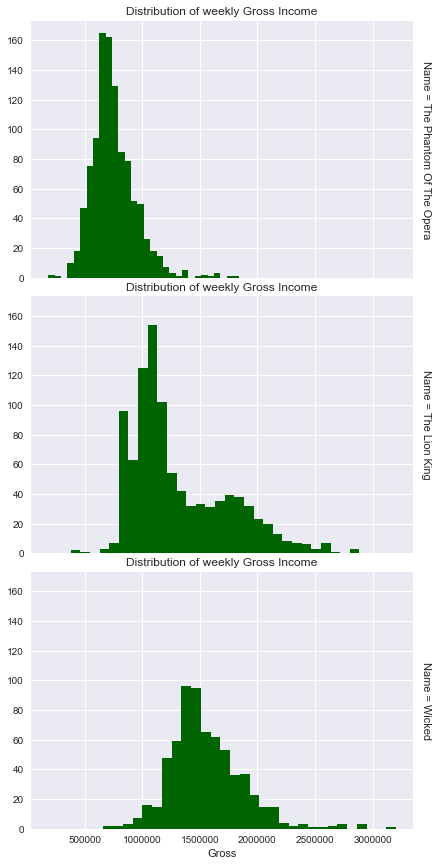

In [107]:
g = sns.FacetGrid(top4_shows, row = 'Name', size = 4, margin_titles=True, aspect= 1.5)
g.map(plt.hist, 'Gross', bins=30,  color = 'darkgreen')
g.set(title = 'Distribution of weekly Gross Income')

Plots above shows distribution the weekly gross income of top 3 shows interms of total gross income since 1990

## Violin plot

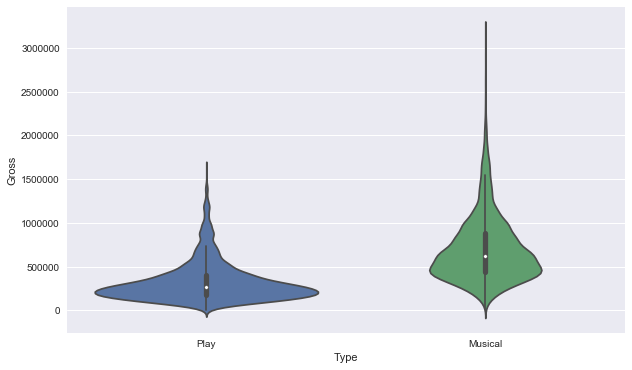

In [110]:
sns.violinplot(x="Type", y="Gross", data=data[data.Type.isin(['Musical', 'Play'])], 
              split = False)

Plot above shows the distribution of weekly income shows of type 'Play' and 'Musical'. There are 22551 Musicals and 8406 Plays in this dataset. Plots indicates that Musicals in general tend to generate higher gross weekly income that Plays.         

## Heatmap

In [133]:
years = range(2007,2017)
decade_top10_theatre = data[data.Year.isin(years)].groupby('Theatre')['Gross'].sum().reset_index()\
        .sort_values('Gross', ascending = False)
decade_top10_theatre = decade_top10_theatre.Theatre[:10]

decade = data[(data.Year.isin(years)) & (data.Theatre.isin(decade_top10_theatre))].groupby(['Theatre', 'Year'])['Gross']\
        .sum().reset_index()
decade = decade.pivot(index='Theatre', columns='Year', values='Gross')

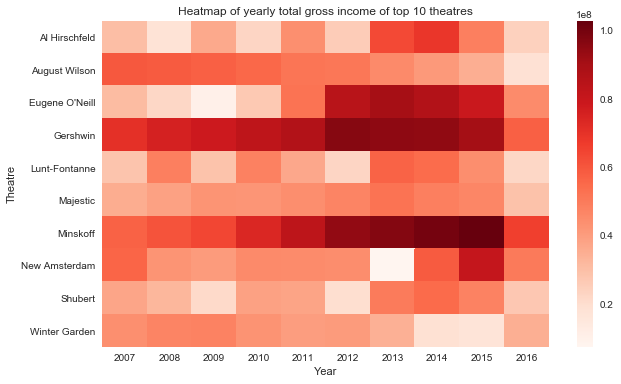

In [143]:
ax = sns.heatmap(decade, cmap = 'Reds')
ax.set(title = 'Heatmap of yearly total gross income of top 10 theatres')

We filter out the top 10 theatres interms of total gross income in the last decade. Then we are using using a heatmap to see how gross yearly income changed for the 10 theatres in last decade.

It is interesting to see that'Gershwin' and 'Minskoff' have been very consistent in generating income. Plot also shows the struggle of 'August Wilson' and ramp up of Eugene O'Neil.